In [3]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2
import matplotlib.patches as patches
import tensorflow as tf
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.models import load_model


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
pip install mtcnn

     |████████████████████████████████| 2.3MB 14.2MB/s 


In [6]:
from mtcnn.mtcnn import MTCNN

In [7]:
images=os.path.join("/content/drive/MyDrive/ML Project/dataset/Medical mask/Medical mask/Medical Mask/images")
annotations=os.path.join("/content/drive/MyDrive/ML Project/dataset/Medical mask/Medical mask/Medical Mask/annotations")
train=pd.read_csv(os.path.join("/content/drive/MyDrive/ML Project/dataset/train.csv"))
submission=pd.read_csv(os.path.join("/content/drive/MyDrive/ML Project/dataset/submission.csv"))

In [8]:
print(len(train))
train.head()

15412


,name,x1,x2,y1,y2,classname
0,2756.png,69,126,294,392,face_with_mask
1,2756.png,505,10,723,283,face_with_mask
2,2756.png,75,252,264,390,mask_colorful
3,2756.png,521,136,711,277,mask_colorful
4,6098.jpg,360,85,728,653,face_no_mask


In [9]:
len(os.listdir(images))

6034

In [10]:
a=os.listdir(images)
b=os.listdir(annotations)
a.sort()
b.sort()

In [11]:
print(len(b),len(a))

4326 6034


In [12]:
train_images=a[1698:]
test_images=a[:1698]

In [13]:
test_images[0]

'0001.jpg'

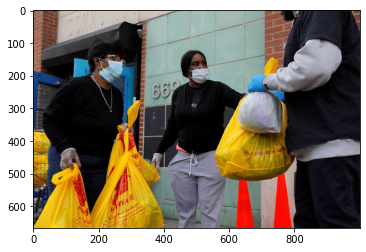

In [14]:
img=plt.imread(os.path.join(images,test_images[324]))
plt.imshow(img)
plt.show()

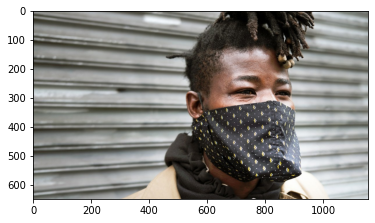

In [15]:
img=plt.imread(os.path.join(images,train_images[56]))
plt.imshow(img)
plt.show()

In [16]:
options=['face_with_mask','face_no_mask']
train= train[train['classname'].isin(options)]
train.sort_values('name',axis=0,inplace=True)

[[688, 1667, 2113, 3113]]


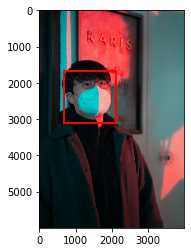

In [17]:
bbox=[]
for i in range(len(train)):
    arr=[]
    for j in train.iloc[i][["x1",'x2','y1','y2']]:
        arr.append(j)
    bbox.append(arr)
train["bbox"]=bbox  
def get_boxes(id):
    boxes=[]
    for i in train[train["name"]==str(id)]["bbox"]:
        boxes.append(i)
    return boxes
print(get_boxes(train_images[66]))
image=train_images[66]

img=plt.imread(os.path.join(images,image))

fig,ax = plt.subplots(1)
ax.imshow(img)
boxes=get_boxes(image)
for box in boxes:
    rect = patches.Rectangle((box[0],box[1]),box[2]-box[0],box[3]-box[1],linewidth=2,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
plt.show()

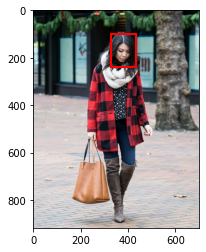

In [18]:
image=train_images[17]

img=plt.imread(os.path.join(images,image))

fig,ax = plt.subplots(1)
ax.imshow(img)
boxes=get_boxes(image)
for box in boxes:
    rect = patches.Rectangle((box[0],box[1]),box[2]-box[0],box[3]-box[1],linewidth=2,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
plt.show()

<BarContainer object of 2 artists>

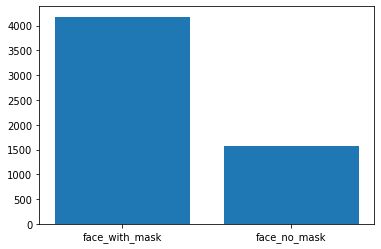

In [19]:
plt.bar(['face_with_mask','face_no_mask'],train.classname.value_counts())

# Creating training data

In [ ]:
img_size=50
data=[]
path='/content/drive/MyDrive/ML Project/dataset/Medical mask/Medical mask/Medical Mask/images'
def create_data():
       for i in range(len(train)):
            arr=[]
            for j in train.iloc[i]:
                   arr.append(j)
            img_array=cv2.imread(os.path.join(images,arr[0]),cv2.IMREAD_GRAYSCALE)
            crop_image = img_array[arr[2]:arr[4],arr[1]:arr[3]]
            new_img_array=cv2.resize(crop_image,(img_size,img_size))
            data.append([new_img_array,arr[5]])
create_data()      

In [ ]:
data[0][0]
plt.imshow(data[0][0])

In [ ]:
x=[]
y=[]
for features, labels in data:
    x.append(features)
    y.append(labels)
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
y=lbl.fit_transform(y)

In [ ]:
x=np.array(x).reshape(-1,50,50,1)
x=tf.keras.utils.normalize(x,axis=1)
from keras.utils import to_categorical
y = to_categorical(y)

# Model Fitting

In [ ]:
from keras.layers import LSTM
model=Sequential()
model.add(Conv2D(100,(3,3),input_shape=x.shape[1:],activation='relu',strides=2))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))


In [ ]:

opt = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-5)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) 
model.fit(x,y,epochs=30,batch_size=5)

Epoch 1/30
1150/1150 [==============================] - 20s 16ms/step - loss: 0.5843 - accuracy: 0.7347
Epoch 2/30
1150/1150 [==============================] - 16s 14ms/step - loss: 0.4674 - accuracy: 0.7750
Epoch 3/30
1150/1150 [==============================] - 16s 14ms/step - loss: 0.4032 - accuracy: 0.8133
Epoch 4/30
1150/1150 [==============================] - 16s 14ms/step - loss: 0.3826 - accuracy: 0.8276
Epoch 5/30
1150/1150 [==============================] - 16s 14ms/step - loss: 0.3385 - accuracy: 0.8563
Epoch 6/30
1150/1150 [==============================] - 16s 14ms/step - loss: 0.3198 - accuracy: 0.8629
Epoch 7/30
1150/1150 [==============================] - 16s 14ms/step - loss: 0.2930 - accuracy: 0.8818
Epoch 8/30
1150/1150 [==============================] - 16s 14ms/step - loss: 0.2807 - accuracy: 0.8810
Epoch 9/30
1150/1150 [==============================] - 15s 13ms/step - loss: 0.2508 - accuracy: 0.8951
Epoch 10/30
1150/1150 [==============================] - 15s 13m

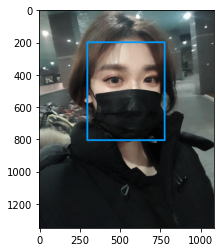

In [ ]:
detector=MTCNN()
img=plt.imread(os.path.join(images,test_images[516]))
face=detector.detect_faces(img)
for face in face:
        bounding_box=face['box']
        x=cv2.rectangle(img,
              (bounding_box[0], bounding_box[1]),
              (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
              (0,155,255),
              10)
        plt.imshow(x)

In [ ]:
detector=MTCNN()
test_df=[]
for image in test_images:
    img=plt.imread(os.path.join(images,image))
    faces=detector.detect_faces(img)
    test=[]
    for face in faces:
        bounding_box=face['box']
        test.append([image,bounding_box])
    test_df.append(test)
test=[]
for i in test_df:
    if len(i)>0:
        if len(i)==1:
            test.append(i[0])
        else:
            for j in i:
                test.append(j)  
sub=[]
rest_image=[]
for i in test:
    sub.append(i[0])
for image in test_images:
    if image not in sub:
        rest_image.append(image) 
detector=MTCNN()
test_df_=[]
for image in rest_image:
    img=cv2.imread(os.path.join(images,image))
    faces=detector.detect_faces(img)
    test_=[]
    for face in faces:
        bounding_box=face['box']
        test_.append([image,bounding_box])
    test_df_.append(test_) 
for i in test_df_:
    if len(i)>0:
        if len(i)==1:
            test.append(i[0])
        else:
            for j in i:
                test.append(j)      

In [ ]:
negative=[]
for i in test:
    for j in i[1]:
        if j<0:
            negative.append(i)
    

In [ ]:
test_data=[]
def create_test_data():
            for j in test:
                if j not in negative:
                    img=cv2.imread(os.path.join(images,j[0]),cv2.IMREAD_GRAYSCALE)
                    img=img[j[1][1]:j[1][1]+j[1][3],j[1][0]:j[1][0]+j[1][2]]
                    new_img=cv2.resize(img,(50,50))
                    new_img=new_img.reshape(-1,50,50,1)
                    predict=model.predict(new_img)
                    test_data.append([j,predict])

create_test_data()      

In [ ]:
image=[]
classname=[]
for i,j in test_data:
    classname.append(np.argmax(j))
    image.append(i)
df=pd.DataFrame(columns=['image','classname'])
df['image']=image
df['classname']=classname
df['classname']=lbl.inverse_transform(df['classname'])
image=[]
x1=[]
x2=[]
y1=[]
y2=[]
for i in df['image']:
    image.append(i[0])
    x1.append(i[1][0])
    x2.append(i[1][1])
    y1.append(i[1][2])
    y2.append(i[1][3])
df['name']=image
df['x1']=x1
df['x2']=x2
df['y1']=y1
df['y2']=y2    
df.drop(['image'],axis=1,inplace=True)

In [ ]:
df.sort_values('name',axis=0,inplace=True,ascending=False)
df.to_csv('/content/drive/MyDrive/ML Project/dataset/submission_1.csv')

In [2]:
def detect_mask(path):
  img=plt.imread(os.path.join(images,path))
  plt.imshow(img)
  face=detector.detect_faces(img)
  test=[]
  for k in face:
    bounding_box=k['box']
    test.append([img,bounding_box])
  for face in face:
          bounding_box=face['box']
          x=cv2.rectangle(img,
                (bounding_box[0], bounding_box[1]),
                (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
                (0,155,255),
                10)
          plt.imshow(x)
  img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
  img=img[bounding_box[1]:bounding_box[1]+bounding_box[3],bounding_box[0]:bounding_box[0]+bounding_box[2]]
  new_img=cv2.resize(img,(50,50))
  new_img=new_img.reshape(-1,50,50,1)

  predict=model.predict(new_img)
  if(np.argmax(predict[0])==0):
    print("No Mask")
  elif(np.argmax(predict[0])==1):
    print("Mask Detected")


Mask Detected


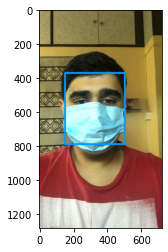

In [ ]:
detect_mask("/niel.jpeg")

In [ ]:
model.save("/content/drive/MyDrive/ML Project/model.h5")

saved weights
